# Random forest predictions
This notebook ingests the positive and negative training vectors as well as the prediction set as generated by the notebook ``ExtractDifferenceVectors.ipynb``. It then perfoms Random forest learning and ranks the prediction set.

In [1]:
import pandas as pd
import os
import sys
import numpy as np
sys.path.insert(0, os.path.abspath('..'))
from kcet import KcetParser
import pickle5 as pickle


In [2]:
data_directory = 'data'
if not os.path.isdir(data_directory):
    raise FileNotFoundError("Could not find data directory")
prediction_pickle_path = os.path.join(data_directory, "predictions.pkl")
positive_diff_pickle_path = os.path.join(data_directory, "positive-vectors.pkl")
negative_diff_pickle_path = os.path.join(data_directory, "negative-vectors.pkl")
with open(prediction_pickle_path, "rb") as fpred:
     diff_vectors_prediction = pickle.load(fpred)
with open(positive_diff_pickle_path, "rb") as fpos:        
    diff_vectors_pos = pickle.load(fpos)
with open(negative_diff_pickle_path, "rb") as fneg:    
    diff_vectors_neg = pickle.load(fneg)

In [3]:
diff_vectors_prediction.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
ncbigene23552-meshd000008,-0.051209,0.084011,0.730405,0.065429,-0.273851,-0.634715,0.291915,0.011568,-0.388758,-0.477592,...,-0.671479,-0.631413,-1.182751,-0.769748,-0.552924,-0.167896,2.148444,-1.958289,1.355626,1.029576
ncbigene23552-meshd000069293,0.668026,0.905762,1.109056,-0.480065,-0.743062,0.409179,-0.146065,-0.571215,-0.851321,-0.358357,...,-0.183441,-0.544079,-0.740178,-0.388561,-1.177781,0.366836,1.934381,-1.855322,0.339110,0.845183
ncbigene23552-meshd000069584,1.507317,0.575125,-0.335976,0.913206,-0.375005,-1.251479,0.404821,-0.503825,-0.137561,-0.989048,...,-1.055705,-1.408217,-1.841650,-0.817985,0.560964,-0.871144,1.509084,-1.217760,1.547691,1.073488
ncbigene23552-meshd000070779,0.104865,0.363398,0.490374,0.108280,-0.851014,0.011914,0.686822,-0.327724,-0.097188,0.270372,...,-0.228353,0.117324,-0.793168,-0.094594,-1.103647,-0.047167,2.611631,-1.604326,0.701129,1.024496
ncbigene23552-meshd000071380,0.910085,0.628064,0.747378,-0.049967,0.676362,0.203443,-0.751914,0.451223,-0.818799,-1.048621,...,0.257055,-0.764454,0.517299,-1.505752,-1.295998,0.464010,2.227612,-1.926709,0.565487,0.795938


In [4]:
diff_vectors_pos.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
ncbigene1956-meshd002289,2.189870,-0.466689,-0.098385,0.241185,-0.241982,-2.480665,-0.281667,-0.498487,-0.066791,0.915691,...,-0.003205,-0.857294,-2.594050,0.723908,1.092950,-0.150143,-0.873464,-0.777208,0.621834,-0.582316
ncbigene2064-meshd002289,1.997948,-0.909466,-0.165297,-0.161491,-0.476931,-0.683900,0.014260,1.058111,0.136936,1.636533,...,1.115135,-0.645337,-2.503659,1.350376,0.984235,1.082525,0.034576,0.532850,-1.102190,-0.719152
ncbigene1956-meshd002294,1.332899,0.359267,0.654361,1.369661,-1.258430,-3.243458,-0.048450,-1.640862,-0.127330,4.118406,...,-0.755723,0.005592,0.475560,0.796344,0.532163,0.133237,-0.522667,-2.909063,1.265789,-0.093357
ncbigene2064-meshd002294,1.140977,-0.083510,0.587450,0.966985,-1.493380,-1.446693,0.247477,-0.084264,0.076398,4.839248,...,0.362617,0.217549,0.565951,1.422812,0.423448,1.365905,0.385374,-1.599005,-0.458234,-0.230194
ncbigene1956-meshd008175,2.150546,-0.264957,0.060147,1.162040,-0.392263,-2.833933,-0.790178,-1.875163,-0.098584,2.669825,...,-0.513041,-0.899361,-1.607996,-0.266547,1.951437,0.077035,-0.771136,-1.508945,0.789593,-0.550009


In [5]:
diff_vectors_neg.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
ncbigene1018-meshd054198,0.103899,0.885684,0.687241,1.989926,-3.249061,-0.157379,3.767309,-2.500732,-0.043585,2.275461,...,-1.712197,-0.122994,-4.925032,3.173496,1.188878,-1.641086,0.509568,-1.066503,0.112508,0.382803
ncbigene1859-meshd015192,-0.227387,0.636755,0.736458,0.230168,-1.303867,-0.160546,2.658063,-0.079331,0.297263,1.684484,...,0.562159,0.045794,-1.495960,1.199635,1.036376,-0.533996,1.233389,-0.347364,0.409854,0.784485
ncbigene23097-meshd018312,-0.539040,0.609390,0.342695,1.144504,-2.004882,-0.852447,2.940399,-2.239879,0.606403,1.757795,...,-1.971231,0.481551,-2.430038,0.346538,-0.264939,-1.887620,1.361328,-0.255230,1.732940,1.962010
ncbigene131890-meshd018240,-0.647635,0.537655,1.018680,0.285206,-1.821212,-0.507014,2.519748,-1.606646,0.582275,1.929192,...,-1.393893,-0.368609,-1.658370,0.668047,-0.585912,-0.995681,1.094341,-0.338298,0.815220,1.530883
ncbigene5058-meshd009376,0.867788,1.009346,1.205338,0.067258,1.506702,0.782745,-1.922141,1.171159,-1.104338,-0.789970,...,1.118838,-1.129496,1.446721,-1.729755,-2.021156,0.784794,1.456880,-1.541305,-1.056086,-0.110134


# Random Forest
### 1. Training set
Create the training set by concatenating ``diff_vectors_pos`` and ``diff_vectors_neg``.

In [6]:
X_train = pd.concat([diff_vectors_pos,diff_vectors_neg])
print("Total training vectors: %d" % len(X_train))

Total training vectors: 643


In [7]:
label_1 = np.ones(diff_vectors_pos.shape[0])
label_0 = np.zeros(diff_vectors_neg.shape[0])
y_train = np.concatenate((label_1,label_0))
print("Total training labels: %d" % len(y_train))

Total training labels: 643


### 2. Test set. 
The test set is the prediction set with one label (either 0 or 1)

In [8]:
X_test = diff_vectors_prediction
label_test = np.ones(diff_vectors_prediction.shape[0])
y_test = label_test

In [9]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
ncbigene23552-meshd000008,-0.051209,0.084011,0.730405,0.065429,-0.273851,-0.634715,0.291915,0.011568,-0.388758,-0.477592,...,-0.671479,-0.631413,-1.182751,-0.769748,-0.552924,-0.167896,2.148444,-1.958289,1.355626,1.029576
ncbigene23552-meshd000069293,0.668026,0.905762,1.109056,-0.480065,-0.743062,0.409179,-0.146065,-0.571215,-0.851321,-0.358357,...,-0.183441,-0.544079,-0.740178,-0.388561,-1.177781,0.366836,1.934381,-1.855322,0.339110,0.845183
ncbigene23552-meshd000069584,1.507317,0.575125,-0.335976,0.913206,-0.375005,-1.251479,0.404821,-0.503825,-0.137561,-0.989048,...,-1.055705,-1.408217,-1.841650,-0.817985,0.560964,-0.871144,1.509084,-1.217760,1.547691,1.073488
ncbigene23552-meshd000070779,0.104865,0.363398,0.490374,0.108280,-0.851014,0.011914,0.686822,-0.327724,-0.097188,0.270372,...,-0.228353,0.117324,-0.793168,-0.094594,-1.103647,-0.047167,2.611631,-1.604326,0.701129,1.024496
ncbigene23552-meshd000071380,0.910085,0.628064,0.747378,-0.049967,0.676362,0.203443,-0.751914,0.451223,-0.818799,-1.048621,...,0.257055,-0.764454,0.517299,-1.505752,-1.295998,0.464010,2.227612,-1.926709,0.565487,0.795938


## Hyperparameter tuning the random forest.

In [10]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
#Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 5, 7, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, None], 'min_samples_split': [2, 3, 5, 7, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


## Search over the parameters to choose the best model

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 10, verbose=2, random_state=42)

rf_random.fit(X_train,y_train)

best_model = rf_random.best_estimator_

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20

[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   1.8s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   1.7s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   1.7s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   1.8s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   1.7s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   1.7s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   2.2s
[CV] END bootstrap=F

In [12]:
rf_random.best_params_


{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': False}

# Link prediction

In [13]:
y_pred = best_model.predict(X_test)
yproba = best_model.predict_proba(X_test)[::,1]

## Decoding results
The ``KcetParser`` class has methods that take the raw X_test vectors and create an annotated dataframe by
decoding strings like ``ncbigene5599-meshd000074723`` to show the corresponding gene symbols and MeSH labels (neoplasms),
and also placing the probabilities of the predictions in the corresponding rows. The resulting dataframe
is sorted according to probability. The ``deleteEmbeddings`` argument determines whether we only return the
three columns ``gene_symbol1``, ``cancer``, and ``probability``.

In [14]:
from kcet import KcetParser
kcetParser = KcetParser()
predictions = kcetParser.decode_predictions(vectors=X_test, probabilities=yproba, deleteEmbeddings=True)
predictions.head(n=20)

[INFO] Reading protein kinase information from /Users/ravanv/PycharmProjects/KCET/input/prot_kinase.tsv
[INFO] ingested symbol_to_id_map with 522 entries such as {'NCBIGene:2870': 'GRK6'}
[INFO] Ingested mesh_id list with 694 entries such as 'meshd000008' and 'meshd000069293', 
[INFO] Ingested _meshid2disease_map with 694 entries
[INFO] Ingested meshid2disease_map with 514 entries
[INFO] Ingested pki_to_kinase with 83 entries


,gene_symbol,cancer,probability
ncbigene25-meshd015174,ABL1,Epidural Neoplasms,0.930
ncbigene25-meshd000237,ABL1,"Adenoma, Basophil",0.905
ncbigene25-meshd058288,ABL1,Sister Mary Joseph's Nodule,0.885
ncbigene25-meshd002472,ABL1,"Cell Transformation, Viral",0.885
ncbigene25-meshd018228,ABL1,"Sarcoma, Small Cell",0.880
ncbigene25-meshd019292,ABL1,Skull Base Neoplasms,0.880
ncbigene25-meshd009366,ABL1,Neoplasm Seeding,0.865
ncbigene25-meshd010039,ABL1,Otorhinolaryngologic Neoplasms,0.860
ncbigene25-meshd000239,ABL1,"Adenoma, Acidophil",0.860
ncbigene3815-meshd008175,KIT,Lung Neoplasms,0.860


In [15]:
print("Total number of predictions:", len(predictions))

Total number of predictions: 334584


In [16]:
predictions.to_csv("predictions_2021.tsv",index=False,sep="\t")

## Probability distributions of positive and negative examples
Here, we plot the distributions of the probabiliies of the positive and negative examples as calculated by the random forest.

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns

We concatenated the vectors as follows. ``X_train = pd.concat([diff_vectors_pos,diff_vectors_neg])``
Therefore, we can extract the individual predictions as follows

In [18]:
pos_probs = []
neg_probs = []
n_pos = len(diff_vectors_pos)
n_predictions = len(predictions)
print("[INFO] Extracting %d positive predictions from a total of %d" % (n_pos, n_predictions))

[INFO] Extracting 62 positive predictions from a total of 334584


In [19]:
for i in range(n_predictions):
    row = predictions.iloc[i]
    pr = float(row['probability'])
    if i < n_pos:
        pos_probs.append(pr)
    else:
        neg_probs.append(pr)
# sanity check
print("[INFO] Got %d positive and %d negative predictions" % (len(pos_probs), len(neg_probs)))

[INFO] Got 62 positive and 334522 negative predictions


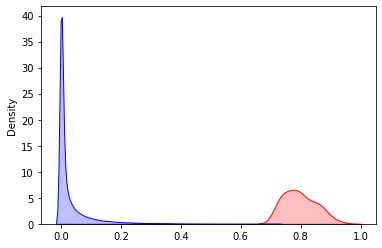

In [26]:

posnp = np.array(pos_probs)
negnp = np.array(neg_probs)
p1=sns.kdeplot(data=posnp, shade=True, color="r")
p1=sns.kdeplot(data=negnp, shade=True, color="b")



The positive examples are shown in red and the negative examples in blue. The separation is of course
an expected result. 
We can calculate some values to estimate some threshold probabilities for predictions.

In [21]:
print("Minimum prob, positive group:", np.min(posnp))
print("Maximum prob, positive group:", np.max(posnp))
print("prob at 1st percentile, positive group:", np.percentile(posnp, 1))
print("prob at 5th percentile, positive group:", np.percentile(posnp, 5))
print("prob at 10th percentile, positive group:", np.percentile(posnp, 20))
print("prob at 20th percentile, positive group:", np.percentile(posnp, 20))
print()
print("Minimum prob, negative group:", np.min(negnp))
print("Maximum prob, negative group:", np.max(negnp))
print("prob at 99th percentile, negative group:", np.percentile(negnp, 99))
print("prob at 95th percentile, negative group:", np.percentile(negnp, 95))
print("prob at 90th percentile, negative group:", np.percentile(negnp, 90))
print("prob at 80th percentile, negative group:", np.percentile(negnp, 80))

Minimum prob, positive group: 0.725
Maximum prob, positive group: 0.93
prob at 1st percentile, positive group: 0.725
prob at 5th percentile, positive group: 0.725
prob at 10th percentile, positive group: 0.745
prob at 20th percentile, positive group: 0.745

Minimum prob, negative group: 0.0
Maximum prob, negative group: 0.72
prob at 99th percentile, negative group: 0.3400000000000001
prob at 95th percentile, negative group: 0.165
prob at 90th percentile, negative group: 0.1
prob at 80th percentile, negative group: 0.045
